# 1.5 Linearity and initial conditions

## 1.5.1 Summary of Linear Systems

Analogous Systems: Translational Mechanical and Electrical  
![image1!](./images_s1/image_1_5_1.png)  

Analogous quantities
* Force is analogous to Voltage (potential variable)
* velocity is analogous to Current (flow variable)
* inertia is analogous to the inductor ($F=m\frac{dv}{dt}\quad V=L\frac{dI}{dt}$)
* viscous drag is analogous to resistance ($F=bv\quad V=IR$)
* the applied force is analogous to the applied voltage

Analogous Differential equations in the time domain  
  
$$m\frac{dv}{dt}+bv=F_g\qquad\qquad\qquad\qquad L\frac{dI}{dt}+IR=V$$  
  
Analogous Differential equations in the frequency domain  
  
$$(sm+b)v(s)=F_g(s)\qquad\qquad\qquad\qquad (sL+R)I(s)=V(s)$$ 

Analogous Transfer Functions  
![image2!](./images_s1/image_1_5_2.png)  

## 1.5.2 Initial conditions

In all of the new methods we have been learning, we have ignored the issue of initial conditions,  
by assuming they are always zero.  
  
Now is the time for us to address initial conditions.  
  
For our translational mechanical system, we have been dropping the ball at t = 0  
But what if we want to throw the ball at t = 0?  
  
Throwing the ball gives it an initial velocity, an initial condition!

For the electrical system, current is analogous to velocity  
so the initial condition for the electrical system is an initial current  
  
Initial conditions are always specified in devices that store energy.  
Energy stroage devices always relate one power conjugate variable to the derivative of the other  
Energy is stored in the velocity as kinetic energy, $E=\frac{1}{2}mv^2$  
Analogously, magnetic energy is stored in an inductor, $E=\frac{1}{2}LI^2$  

Consider the rule for the inductor, $V_L(t)=L\frac{dI(t)}{dt}$  

Use the Laplace Transform Table to transform this equation; $V_L(s)=L\left[sI(s)-I(0)\right]$  
In everything we have done so far, we have set $I(0)=0$, but now let's give it a value, an initial condition

Re-writing the frequency domain equation gives  
$$V_L(s)=sLI(s)-LI(0)$$  
which is two voltages added together. In circuit's, two voltages added together  
are circuits elements connected in series.  
  
The first voltage is proportional to the frequency and current; an inductor  
The second voltage is independent of frequency; an impulse voltage source  
(Look at the Laplace Table, an impulse tranforms to 1, 1 is a constant independent of frequency)

The initial condition is an impulse voltage source in series with the inductor  
![image3!](./images_s1/image_1_5_3.png)  

## 1.5.3 Add the initial condition to the system

The circuit diagram, including the initial condition is shown below  
![image4!](./images_s1/image_1_5_4.png)  

Use Kirchhoff's voltage law to write the system equation in the frequency domain  
  
$$\sum V=0=-V(s)+sLI(s)-LI(0)+RI(s)$$  
  
which gives  
  
$$(sL+R)I(s)=V(s)+LI(0)$$  
  
The initial condition presents itself as an additional applied voltage source  

## 1.5.4 Solution to an example system with an initial condition

Let's define some properties of our system, so we can look at a solution  
* R = 20$\Omega$
* L = 0.2H
* initial current, $I(0^-)=-0.4A$
* applied voltage is a 5V step source which turns on a $t=0$, $V(s)=\frac{5}{s}$

Substitute these into the system equation  
  
$$(0.2s+20)I(s)=\frac{5}{s}-0.08$$  
  
solve for I(s)  
  
$$I(s)=\frac{-0.08s+5}{s}\times\frac{1}{0.2s+20}$$  
  
multiply, and make the highest order coefficient of s in the denominator equal to unity  
  
$$I(s)=\frac{-0.4s+25}{s(s+100)}$$  
  
This is our solution!  The current as a function of frequency

## 1.5.5 Converting the solution back to the time domain

To convert back to the time domain, we need to look up I(s) in the Laplace Table  
  
Unfortunately, $\frac{-0.4s+25}{s(s+100)}$ is not in our table  
  
We need to see if we can put the formula for I(s) into a form that we can look up in our table

If we put I(s) in the form  
$$I(s)=\frac{R_1}{s}+\frac{R_2}{s+100}$$  
then I(s) would be a step function added to an exponential  
both terms are in our table!

Take a look, if $R_1=0.25$ and $R_2=-0.65$  
  
then  
$$I(s)=\frac{0.25}{s}+\frac{-0.65}{s+100}=\frac{0.25(s+100)}{s(s+100)}+\frac{-0.65s}{s(s+100)}$$  
$s(s=100)$ is a common denominator, so we can add the numerators, to get  
  
$$I(s)=\frac{-0.4s+25}{s(s+100)}$$  
  
That's it! But how did you know $R_1=0.25$ and $R_2=-0.65$?

$R_1$ and $R_2$ are called the residues of the system  
Their values tell us the strength of the step response and the exponential response  
  
Residues are found by a technique called partial fraction expansion  
Partial fraction expansion is like finding the common denominator of the terms - but backwards  
  
There are many ways to find perform partial fraction expansion, including the residue method  
  
We will use the python library SciPy

## 1.5.6 Finding the residues of a system

Scipy.signal has a method called residue  The method returns the residues of the system as an array  
You need to find the signal as a function of frequency and write it as a polynomial of s, over a polynomial of s  
Then you have to pass the coefficients of the numerator and the denominator of the signal to the method,  
just as you did to create an lti object  
[residue](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.residue.html#scipy.signal.residue)  

The polynomial $5s^3+2s+10$ is a third order polynomial  
The order matches the highest power of s  
  
The residue method will return an array with the same number of elements as the order of the polynomial in the denominator  
In our example, the denominator is second order, so there should be two residues

The number of residues will match the order of the denominator as long as the  
order of the numerator is less than the denominator  
  
If the numerator has an equal or higher order than the denominator,  
then the returned array, named "k", will not be empty  
"k" returns the coefficients of a polynomial of s.  
That polynomial must be added to the soution, if "k" is not empty  
  
This is a rather uncommon occurance in physical linear systems, but you should be aware that the residues  
only give you the complete answer when the order of the polynomial in the numerator is less than the denominator

In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

# enter the numerator and the denominator of I(s), dont forget the zero!
num = [-0.4, 25]
den = [1, 100, 0]

# compute the residues for I(s)
r, p, k = sig.residue(num, den)

print(type(r))
print(r)

<class 'numpy.ndarray'>
[ 0.25 -0.65]


In our example, the denominator was $s^2+100s$  
If we let $s=-100$, then the denominator will become zero  
When the denominator is zero, I(s) will have an infinite amount of energy at that frequency,  
Because of the infinite response at $s=-100$, the frequency $s=-100$[Np/s] is called a "pole"  
  
For the R-L system we are studying, $s=-100$ is a pole of the system,  
which is also known as the natural frequency of the system  
That means, if this R-L circuit is driven by a $s=-100$[Np/s] frequency wave, the response would be very strong  
  
Even though we drove the system with a wave of $s=0$, it still excited the natural response of the system  

The frequency $s=0$ also causes the demoniator of I(s) to equal 0 and causes I(s) to go to infinity  
  
This happens because we are indeed driving the circuit at $s=0$  
The 5V step source causes a forced response at $s=0$  
  
In either case, $s=-100$ and $s=0$ are both poles of the signal I(s)  

When we write the equation for I(s) as 
$$I(s)=\frac{0.25}{s}+\frac{-0.65}{s+100}$$  
The term with $s$ in the denominator, represents the forced response, also called the particular response,  
while the term with $s+100$ in the denominator, represents the natural response of the system

In [2]:
print(type(r))
print('residues of I(s) ',r)
print()
print(type(p))
print('poles of I(s) ',p)

<class 'numpy.ndarray'>
residues of I(s)  [ 0.25 -0.65]

<class 'numpy.ndarray'>
poles of I(s)  [   0. -100.]


You have to pay attention to which residue goes with which pole  
Scipy.signal.residue always puts them in the same order  
  
Therefore, 0.25 is the residue for $s=0$  
and -0.65 is the residue for $s=-100$

## 1.5.7 Transforming the solution back to time

After all that work, it's easy to transform I(s) back to the time domain  
$$I(s)=\frac{0.25}{s}+\frac{-0.65}{s+100}$$  

just look up the terms in the Laplace Table  
$$I(t)=0.25-0.65e^{-100t}\;for\;t>0$$  
If you put in $t=0$, then $I(0)=-0.4$, just what we gave for the initial condition

We can also use Scipy to transform I(s) back to the time domain  
We just need to create an lti signal for I(s)  

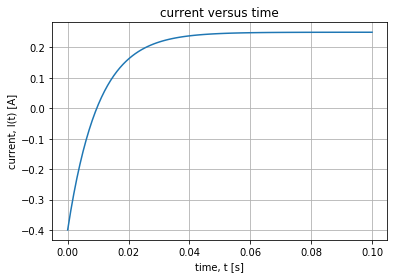

In [3]:
# enter the numerator and the denominator of I(s), dont forget the zero!
num = [-0.4, 25]
den = [1, 100, 0]

# create an lti signal
I_s = sig.lti(num, den)

# create a time array for the solution because the default time array is too long
t = np.linspace(0, 0.1, 100)

# use the impulse method to find the response
t, I_t = I_s.impulse(T=t)

# plot the results
plt.plot(t, I_t)
plt.xlabel('time, t [s]')
plt.ylabel('current, I(t) [A]')
plt.title('current versus time')
plt.grid()

## 1.5.8 Integrate to find the charge

Current is defined as Coulombs per second; [A] = [C/s]  
If we integrate the current over time, we should get how much charged has flowed through the circuit up to a given time  
  
Because the current starts out negative, charge flows up through the inductor, which we will call negative charge  
when the current switched to positve current and starts flowing down through the inductor, we will start adding positive charge

It's easy to integrate in the frequency domain. Simply divide by s!
  
$$q(s)=\frac{-0.4s+25}{s(s+100)}\times\frac{1}{s}=\frac{-0.4s+25}{s^3+100s^2}$$

To solve this new equation for charge, we must make a new lti for charge using Scipy

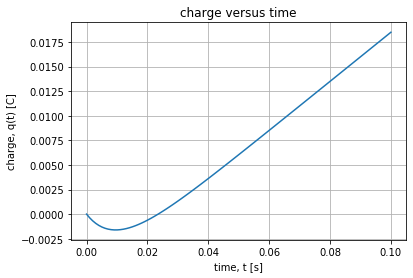

In [4]:
# enter the numerator and the denominator of Q(s), 
# dont forget to add another zero!
num = [-0.4, 25]
den = [1, 100, 0, 0]

# create an lti signal
q_s = sig.lti(num, den)

# create a time array for the solution because the default time array is too long
t = np.linspace(0, 0.1, 100)

# use the impulse method to find the response
t, q_t = q_s.impulse(T=t)

# plot the results
plt.plot(t, q_t)
plt.xlabel('time, t [s]')
plt.ylabel('charge, q(t) [C]')
plt.title('charge versus time')
plt.grid()

## 1.5.9 lti "linear time invariant" systems

Let's make sure we understand some of limitations involved in the material we are learning  
All of the systems we will study in Fundamentals of Linear Systems must be linear time invariant systems  
So what does linear time invariant mean?

## 1.5.10Time invariance

A time invariant system means that an applied input causes a corresponding output, regardless of when the input is applied  
  
You can show time invariance by appying an input, x(t) and a delayed input, x(t+dt)  
and showing that the delayed output y(t+dt) exactly matches the original output except also delayed by the time dt  
  
For our purposes, time invariance means the system does not change with time.  
Our example systems depended on m, b, L, and R.  It's these quantities that can't change over time  
For example, a 100$\Omega$ resistor must always remain 100 Ohms in a time invariant system  
[Time invariance](https://en.wikipedia.org/wiki/Time-invariant_system)

## 1.5.11 Linearity

Linearity means a system has both homogeneity and additivity.  
  
Consider the system $y=mx$. Certainly, this must be linear  
[Linearity](https://en.wikipedia.org/wiki/Linearity)

### 1.5.11.1 Homogeneity

Homogeneity means that if you scale x by a constant, you scale y by the same constant  
In other words, if you substitute $ax_1$ for x, then y should scale by the factor a; or y should equal $ay_1$  
a is an arbitrary constant  
  
It's easy to show $y=mx$ obeys homogeneity; put $x_1$ in the system and you get $y_1=mx_1$  
Now put $ax_1$ in the system and you get $y=m(ax_1)$.  But $mx_1$ is $y_1$.  By substitution, $y=ay_1$  
[Homogeneity](https://en.wikipedia.org/wiki/Homogeneous_function)

### 1.5.11.2 Additivity

Additivity means that if you add two different x values together, then y will also be the two y values added together  
If you substitute $x_1+x_2$ for x, then y should also be $y_1+y_2$  
  
Let's show $y=mx$ obeys additivity;  
again put $x_1$ in the system and you get $y_1=mx_1$. Put $x_2$ in the system and you get $y_2=mx_2$  
Now put $x_1+x_2$ in the system and you get $y=m(x_1+x_2)$. But $mx_1$ is $y1$ and $mx_2$ is $y2$  
By substitution, $y=y_1+y_2$  
[Additivity](https://en.wikipedia.org/wiki/Additive_function)

### 1.5.11.3 $y=mx$ is linear

You can show both homogeneity and additivity at the same time  
Let $x=ax_1+x_2$.  A homogenious and additive system will have $y=ay_1+y_2$  
where $a$ is an arbitrary constant
  
Just like before, $y_1=mx_1$ and $y_2=mx_2$.  
Put $x=ax_1+x_2$ into the system and you get $y=m(ax_1+x_2)$  
From simple substitute, you see that $y=ay_1+y_2$

### 1.5.11.4 $y=mx^2$ is a non-linear system, 

We should guess that $y=mx^2$ is non-linear, you can't multiply signals together    
But let's show that's the case with our new definitions  
Let $x=ax_1+x_2$.  For this system to be linear, $y=ay_1+y_2$  
  
From the definition of the system, $y_1=mx_1^2$ and $y_2=mx_2^2$  
Substitute $x=ax_1+x_2$ into the system and you get $y=m(ax_1+x_2)^2$  
expand the equation to get $y=ma^2x_1^2+2max_1x_2+mx_2^2$  
  
By substitution, we can write this in terms of $y_1$ and $y_2$; $y=a^2y_1+2a\sqrt{y_1y_2}+y_2$  
  
Clearly $y\neq ay_1+y_2$. $y=mx^2$ is non-linear

### 1.5.11.5 $y=mx+b$ is not a linear system!  It's an affine linearity

Try our definition of linearity with $y=mx+b$.  You would expect the equation of a line to be a linear system  
Let $x=ax_1+x_2$.  For linearity, $y=ay_1+y_2$ 
  
For this system, $y_1=mx_1+b$ and $y_2=mx_2+b$  
Substitute $x=ax_1+x_2$ and you get $y=m(ax_1+x_2)+b$  
By substitution, write this in terms of $y_1$ and $y_2$; $y=ay_1+y_2-ab$  
  
Amazingly $y\neq ay_1+y_2$. $y=mx+b$ is not a linear system!  
  
In mathmatics, this type of linearity is called an affine linearity  
which does not satisfy homogeneity or additivity  
  
[Affine linearity](https://en.wikipedia.org/wiki/Linearity): See the section on Linear polynomials

## 1.5.12 Transfer functions cannot include initial conditions

When we add initial conditions to our system, the system becomes an affine linearity  
and it will not obey homogeneity or additivity.  

We can still use the Laplace methods and lti objects to solve for signals with initial conditions  
because the initial condition is treated as additional input signal  
but we cannot define transfer functions with initial conditions  
  
Transfer functions describe lti systems and can never include initial conditions  

Go back to our original equation describing the R-L circuit with an initial condition  
  
$$(sL+R)I(s)=V(s)+LI(0)$$ 
  
You cannot define $H(s)=\frac{I(s)}{V(s)}$ because you cannot separate the varaibles  
  
$$\frac{I(s)}{V(s)}=\frac{\frac{1}{L}+\frac{I(0)}{V(s)}}{s+\frac{R}{L}}$$  
  
Not a transfer function!  V(s) is on both sides of the equation